In [558]:
import pandas as pd
import seaborn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import shuffle

In [541]:
# reading training file
data = pd.read_csv("training.csv", header = 0)

# Data Preprocessing 1


In [542]:
print(data.head())

   Marital status  Application mode  Application order  Course  \
0             4.0               7.0                1.0  9147.0   
1             1.0              39.0                1.0  9085.0   
2             1.0               1.0                6.0  9070.0   
3             2.0              39.0                1.0  9238.0   
4             1.0               1.0                3.0  9500.0   

   Daytime/evening attendance\t  Previous qualification  \
0                           1.0                     3.0   
1                           1.0                     1.0   
2                           1.0                     6.0   
3                           1.0                    19.0   
4                           1.0                     1.0   

   Previous qualification (grade)  Nationality  Mother's qualification  \
0                           130.0          1.0                    19.0   
1                           130.0          1.0                    37.0   
2                         

In [543]:
print(data.columns)

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nationality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

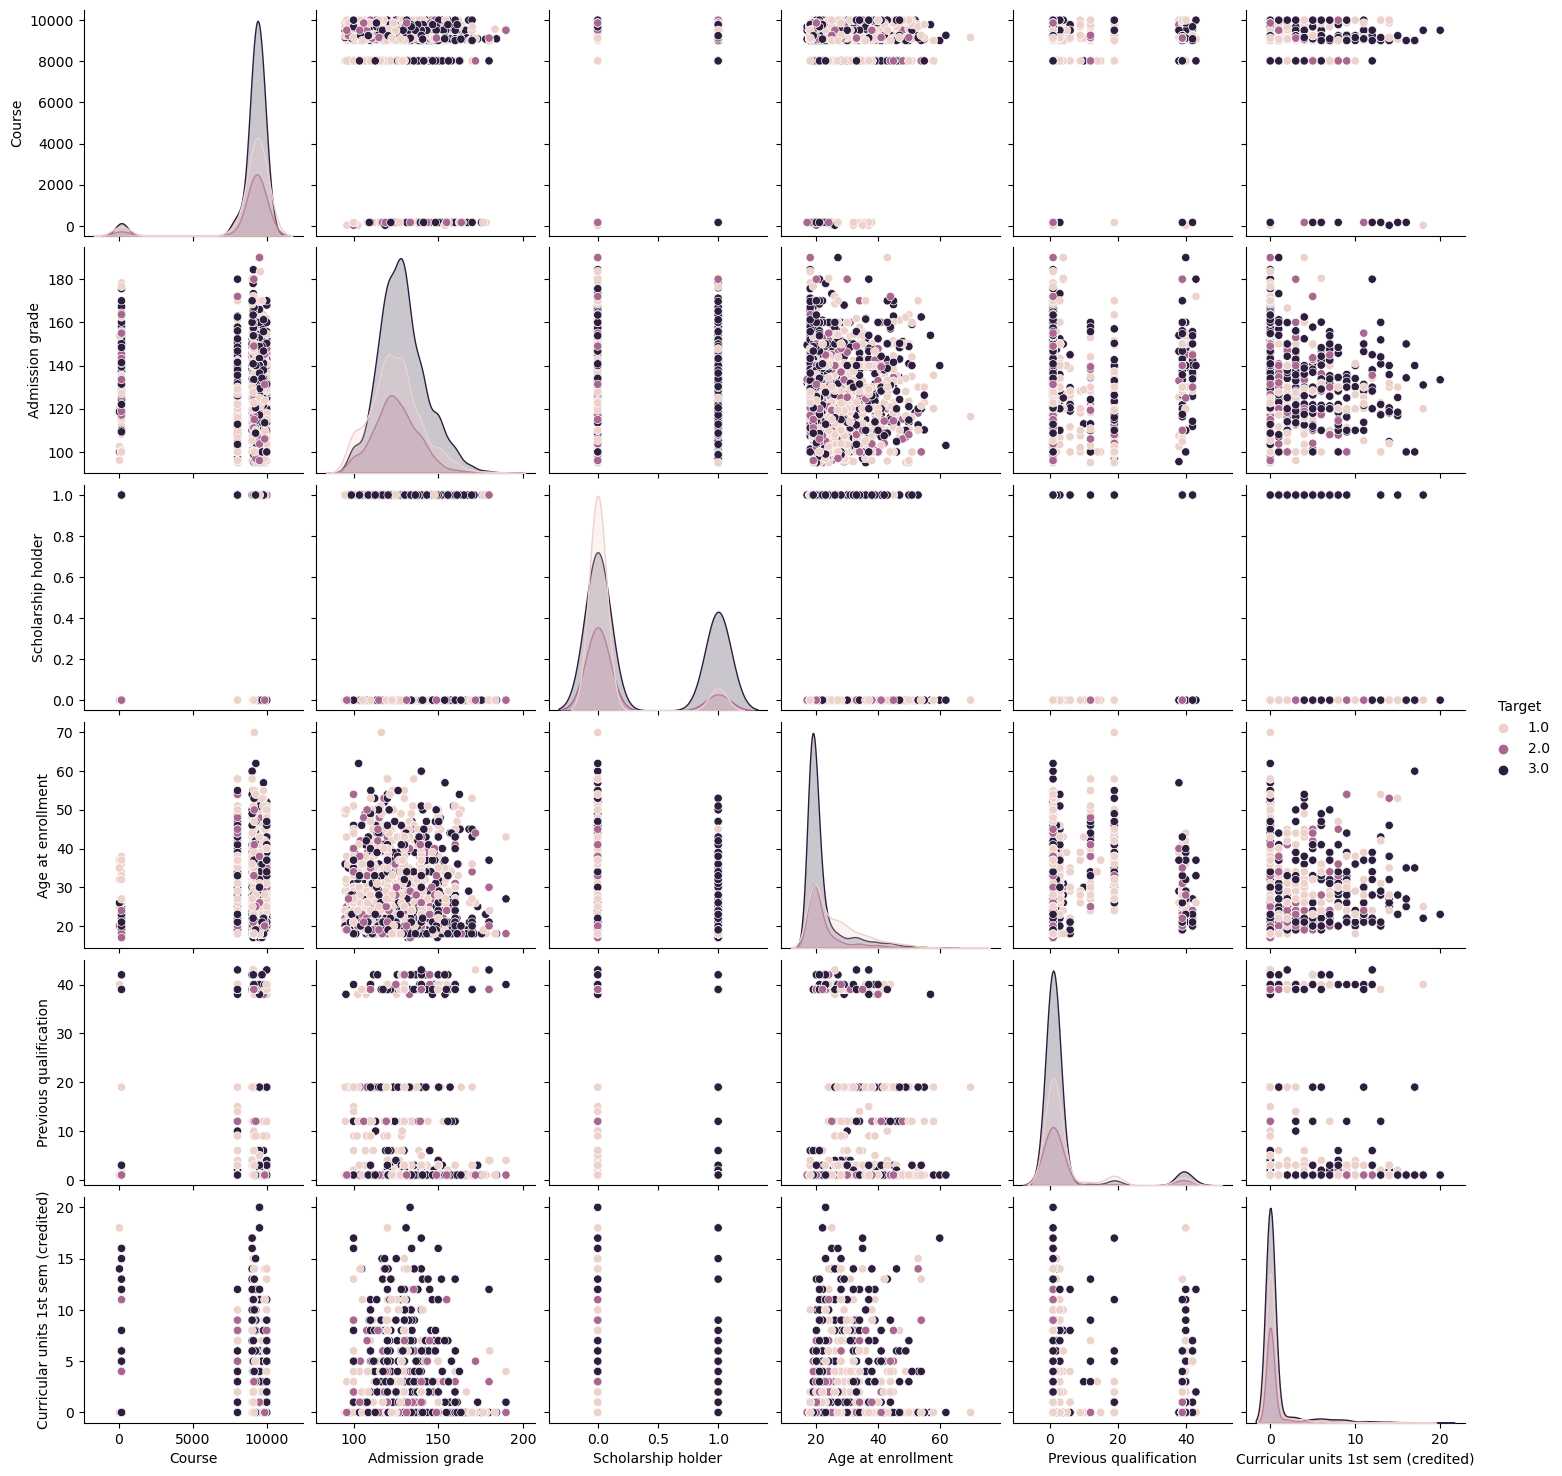

In [544]:
#Plotting some attributes and target
seaborn.pairplot(data, hue = 'Target', vars = [ 'Course', 'Admission grade', 'Scholarship holder',
       'Age at enrollment', 'Previous qualification', 'Curricular units 1st sem (credited)'])
plt.savefig('pairplot.png')
plt.show()

In [545]:
#Getting the values of the dataset
dataset = data.values
print(dataset[:2])

[[4.00000000e+00 7.00000000e+00 1.00000000e+00 9.14700000e+03
  1.00000000e+00 3.00000000e+00 1.30000000e+02 1.00000000e+00
  1.90000000e+01 1.00000000e+00 5.00000000e+00 5.00000000e+00
  1.30000000e+02 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.00000000e+00 0.00000000e+00 0.00000000e+00 3.50000000e+01
  0.00000000e+00 0.00000000e+00 5.00000000e+00 5.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  5.00000000e+00 5.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 1.11000000e+01 6.00000000e-01 2.02000000e+00
  1.00000000e+00]
 [1.00000000e+00 3.90000000e+01 1.00000000e+00 9.08500000e+03
  1.00000000e+00 1.00000000e+00 1.30000000e+02 1.00000000e+00
  3.70000000e+01 3.70000000e+01 6.00000000e+00 6.00000000e+00
  1.10000000e+02 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.00000000e+00 0.00000000e+00 1.00000000e+00 2.50000000e+01
  0.00000000e+00 0.00000000e+00 6.00000000e+00 1.30000000e+01
  3.00000000e+00 1.16666667e+01 0.00000000e+00 0.000

In [546]:
# Spliting into labels and attributes
X = dataset[:, :-1]
Y = dataset[:, -1]


In [547]:
#Normalizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X)
Y_train = Y


# Model

In [572]:
class KNN:
    def __init__(self, k):
        self.k = k #initializing k value
        
    def fit_data(self, X_train, Y_train):
        # fitting training and test data
        self.X_train = X_train
        self.Y_train = Y_train
        
    def euclidean_distance(self, x, y):
        # Euclidean distance calculation
        return np.sqrt(np.sum((x - y) ** 2))   
    
    def manhattan_distance(self, x, y):
        # Manhattan distance calculation
        return np.sum(np.abs(x - y))   
        
    def predict_data(self, X):  
        y_prediction = [self.prediction(x) for x in X]
        return y_prediction
    
    def find_k_nearest_neighbors(self, distances):
        
        ''' ***** Finding K nearest labels ***
             1) Sorting the distances in ascending order
             2) Getting first K indices
             3) Getting the labels of that indices'''
        
        sorted_distances = dict(sorted(distances.items(), key=lambda item: item[1]))
        k_nearest_indices = list(sorted_distances.keys())[:self.k]
        k_nearest_labels = [self.Y_train[i] for i in k_nearest_indices]
        return k_nearest_labels
    
    def find_y_predicted(self, k_nearest_neighbors):
        
        ''' **** Predicting the class based on K nearest neighbors **** 
        
             1) Calculating each labels count 
             2) Find the label with max count '''
        
        target_class = {1: 0, 2: 0, 3: 0}
        for label in k_nearest_neighbors:
            target_class[label]+=1
            
        y_pred = max(target_class, key = target_class.get)
        return y_pred
    
    def prediction(self, x):
        
        ''' **** Pipeline for KNN **** 
             1) Finding the distances for each x_test values
             2) Find the K - nearest neighbors
             3) Predicting the Y label.  '''
        distances = {}
        for i in range(len(self.X_train)):
            # using euclidian distance because it gives best result..
            distance = self.euclidean_distance(x, self.X_train[i])
            distances[i] = distance
            
        k_nearest_labels = self.find_k_nearest_neighbors(distances)
        y_predicted = self.find_y_predicted(k_nearest_labels)
        
        return y_predicted
            
            

# Cross Validation

In [524]:
def cross_validation_calculation(predictions, Y_test):
    
    ''' *** Cross Validation Calculation [Confusion Matrix] *** 
          1) filling zeros for 3x3 confusion matrix
          2) Updating the count on each index based on predicted values and true values
    '''
    confusion_matrix = np.zeros((3, 3), dtype = int)
    Y_test = [int(label) for label in Y_test]
    predictions = [int(label) for label in predictions]
    for i in range(len(Y_test)):
        confusion_matrix[Y_test[i]-1, predictions[i]-1]+= 1
    return confusion_matrix    
        

# Data Preprocessing 2 ( Features Reduction, Label Encoding)

In [526]:
# Mutual information calculation for training set
mutual_information = mutual_info_classif(X_train, Y_train)

In [527]:
cols = data.columns
cols = cols[:-1]
print(cols)

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nationality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

In [528]:
# Creating dictionary with key as col and value MI score
column_mf_mapping = {}
for i in range(len(cols)):
    column_mf_mapping[cols[i]] = mutual_information[i]
print(column_mf_mapping)    

{'Marital status': 0.020767898346667923, 'Application mode': 0.05750592296062251, 'Application order': 0.008211005339193278, 'Course': 0.0582727656527493, 'Daytime/evening attendance\t': 0.0, 'Previous qualification': 0.040464607100891614, 'Previous qualification (grade)': 0.04093405557818097, 'Nationality': 0.0, "Mother's qualification": 0.02447001169972607, "Father's qualification": 0.02382601671515805, "Mother's occupation": 0.016814988840795797, "Father's occupation": 0.0286044671053709, 'Admission grade': 0.0, 'Displaced': 5.239753269647984e-05, 'Educational special needs': 0.016507420392310124, 'Debtor': 0.03862696059303561, 'Tuition fees up to date': 0.1081476695789847, 'Gender': 0.00886056231395993, 'Scholarship holder': 0.04975135947720766, 'Age at enrollment': 0.04645958662767313, 'International': 0.019993235691565747, 'Curricular units 1st sem (credited)': 0.019525874158394352, 'Curricular units 1st sem (enrolled)': 0.06978759513625299, 'Curricular units 1st sem (evaluations

In [529]:
# sorting the dictionary based on MI score
sorted_mf = dict(sorted(column_mf_mapping.items(), key=lambda item: item[1], reverse=True))
print(sorted_mf)

{'Curricular units 2nd sem (approved)': 0.3325716496638964, 'Curricular units 1st sem (approved)': 0.2445652254369468, 'Curricular units 2nd sem (grade)': 0.24111633956929346, 'Curricular units 1st sem (grade)': 0.20241562811266656, 'Tuition fees up to date': 0.1081476695789847, 'Curricular units 2nd sem (evaluations)': 0.09934934873045687, 'Curricular units 1st sem (evaluations)': 0.08448363210012588, 'Curricular units 1st sem (enrolled)': 0.06978759513625299, 'Course': 0.0582727656527493, 'Application mode': 0.05750592296062251, 'Scholarship holder': 0.04975135947720766, 'Age at enrollment': 0.04645958662767313, 'Previous qualification (grade)': 0.04093405557818097, 'Previous qualification': 0.040464607100891614, 'Debtor': 0.03862696059303561, 'Curricular units 2nd sem (enrolled)': 0.03360077338375711, "Father's occupation": 0.0286044671053709, "Mother's qualification": 0.02447001169972607, "Father's qualification": 0.02382601671515805, 'Marital status': 0.020767898346667923, 'Curric

/var/folders/02/5p20n53n5m93n_nfjv_hj42w0000gn/T/ipykernel_72020/2430022692.py:9: UserWarning: Glyph 9 (	) missing from current font.
  plt.tight_layout()
/Users/lokeshwaran/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


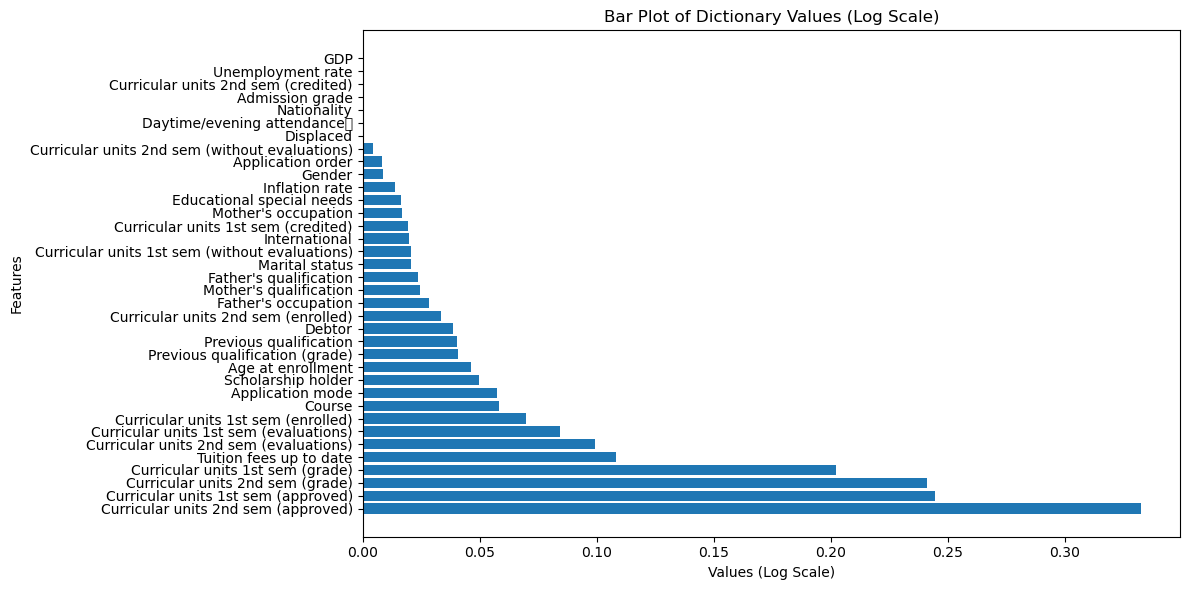

In [530]:
#Plotting the columns and MI values to visualize
keys = list(sorted_mf.keys())
values = list(sorted_mf.values())
plt.figure(figsize=(12,6))
plt.barh(keys,values)
plt.xlabel('Values (Log Scale)')
plt.ylabel('Features')
plt.title('Bar Plot of Dictionary Values (Log Scale)')
plt.tight_layout()
plt.show()

In [534]:
# getting only top 29 features
print(keys[:29])
reduced_features = keys[:29]

['Curricular units 2nd sem (approved)', 'Curricular units 1st sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 1st sem (grade)', 'Tuition fees up to date', 'Curricular units 2nd sem (evaluations)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (enrolled)', 'Course', 'Application mode', 'Scholarship holder', 'Age at enrollment', 'Previous qualification (grade)', 'Previous qualification', 'Debtor', 'Curricular units 2nd sem (enrolled)', "Father's occupation", "Mother's qualification", "Father's qualification", 'Marital status', 'Curricular units 1st sem (without evaluations)', 'International', 'Curricular units 1st sem (credited)', "Mother's occupation", 'Educational special needs', 'Inflation rate', 'Gender', 'Application order', 'Curricular units 2nd sem (without evaluations)']


In [548]:
# One hot encoding for Marital status column
reduced_data = data[reduced_features]
# df_encoded = reduced_data
df_encoded = pd.get_dummies(reduced_data, columns=['Marital status'], prefix=['Marital status'])
print(df_encoded.head())

   Curricular units 2nd sem (approved)  Curricular units 1st sem (approved)  \
0                                  0.0                                  0.0   
1                                  2.0                                  3.0   
2                                  6.0                                  6.0   
3                                  0.0                                  0.0   
4                                  6.0                                  6.0   

   Curricular units 2nd sem (grade)  Curricular units 1st sem (grade)  \
0                          0.000000                          0.000000   
1                         11.333333                         11.666667   
2                         13.625000                         14.166667   
3                          0.000000                          0.000000   
4                         13.900000                         13.900000   

   Tuition fees up to date  Curricular units 2nd sem (evaluations)  \
0               

In [549]:
reduced_values = df_encoded.values
X = reduced_values
Y = dataset[:, -1]
print(set(Y))

{1.0, 2.0, 3.0}


In [562]:
def k_fold_cross_validation(X, Y, folds):
    
    ''' *** K- fold selecting code *** '''
    
    
    #initailizing the folds
    x_train_folds = []
    x_test_folds = []
    
    y_train_folds = []
    y_test_folds = []
    
    X, Y = shuffle(X, Y, random_state=42)
    fold_size = len(X) // folds # calculating the fold size
    
    for i in range(folds):
        #calculating the indexes
        start_index = i * fold_size
        end_index = (i+1) * fold_size if i < (folds - 1) else len(X)
        
        # fetch and update the values based on the index
        x_test_set = X[start_index:end_index]
        x_train_set = np.concatenate((X[:start_index], X[end_index:]))
        
        y_test_set = Y[start_index:end_index]
        y_train_set = np.concatenate((Y[:start_index], Y[end_index:]))
        
        x_train_folds.append(x_train_set)
        x_test_folds.append(x_test_set)
        
        y_train_folds.append(y_train_set)
        y_test_folds.append(y_test_set)
    
    return x_train_folds, x_test_folds, y_train_folds, y_test_folds

In [563]:

scaler = StandardScaler()
X_train = scaler.fit_transform(X)
Y_train = Y

In [583]:
''' **** K - fold cross validation'''
folds =10 # K -values. Tried with 5, 7, 10 15. Chosen 10
x_train_folds, x_test_folds, y_train_folds, y_test_folds = k_fold_cross_validation(X_train, Y_train, folds)
for i in range(folds):
    for k in range(5,25):
        X_train_fold, X_val_fold = x_train_folds[i], x_test_folds[i]
        Y_train_fold, Y_val_fold = y_train_folds[i], y_test_folds[i]
        knn_classifier = KNN(k=k)
        knn_classifier.fit_data(X_train_fold, Y_train_fold)
        predictions = knn_classifier.predict_data(X_val_fold)
        confusion_matrix = cross_validation_calculation(predictions, Y_val_fold)
        accuracy_score = (confusion_matrix[0][0] + confusion_matrix[1][1] + confusion_matrix[2][2]) / (len(Y_val_fold))
        if accuracy_score > 0.74:
            print("k: {} ====== index: {} ==== accuracy: {}".format(k, i, accuracy_score))

k: 11 ====== index: 2 ==== accuracy: 0.7478753541076487
k: 12 ====== index: 2 ==== accuracy: 0.7563739376770539
k: 13 ====== index: 2 ==== accuracy: 0.7648725212464589
k: 14 ====== index: 2 ==== accuracy: 0.7592067988668555
k: 15 ====== index: 2 ==== accuracy: 0.7507082152974505
k: 16 ====== index: 2 ==== accuracy: 0.7620396600566572
k: 17 ====== index: 2 ==== accuracy: 0.7592067988668555
k: 18 ====== index: 2 ==== accuracy: 0.7535410764872521
k: 19 ====== index: 2 ==== accuracy: 0.7507082152974505
k: 20 ====== index: 2 ==== accuracy: 0.7507082152974505
k: 21 ====== index: 2 ==== accuracy: 0.7422096317280453
k: 18 ====== index: 3 ==== accuracy: 0.7450424929178471
k: 19 ====== index: 3 ==== accuracy: 0.7422096317280453
k: 20 ====== index: 3 ==== accuracy: 0.7507082152974505
k: 21 ====== index: 3 ==== accuracy: 0.7450424929178471
k: 22 ====== index: 3 ==== accuracy: 0.7422096317280453
k: 23 ====== index: 3 ==== accuracy: 0.7592067988668555
k: 24 ====== index: 3 ==== accuracy: 0.747875354

# Predicting for the Given test set

In [565]:
data = pd.read_csv("test.csv", header = 0)
print(keys[:29])
reduced_features = keys[:29]

['Curricular units 2nd sem (approved)', 'Curricular units 1st sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 1st sem (grade)', 'Tuition fees up to date', 'Curricular units 2nd sem (evaluations)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (enrolled)', 'Course', 'Application mode', 'Scholarship holder', 'Age at enrollment', 'Previous qualification (grade)', 'Previous qualification', 'Debtor', 'Curricular units 2nd sem (enrolled)', "Father's occupation", "Mother's qualification", "Father's qualification", 'Marital status', 'Curricular units 1st sem (without evaluations)', 'International', 'Curricular units 1st sem (credited)', "Mother's occupation", 'Educational special needs', 'Inflation rate', 'Gender', 'Application order', 'Curricular units 2nd sem (without evaluations)']


In [566]:
# feature reduction, one hot encoding and Normalization for test data.
reduced_data = data[reduced_features]
df_encoded_X = pd.get_dummies(reduced_data, columns=['Marital status'], prefix=['Marital status'])
X_test_new = scaler.fit_transform(df_encoded_X.values)
print(len(X_test_new))

885


In [567]:
# Using 6th fold training data and k value 12
X_train_fold = x_train_folds[5]
Y_train_fold = y_train_folds[5]

knn_classifier = KNN(k=12)
knn_classifier.fit_data(X_train_fold, Y_train_fold)
predictions = knn_classifier.predict_data(X_test_new)
print(len(predictions))
file_name = "format.txt"


with open(file_name, 'w') as file:
    for prediction in predictions:
        file.write(str(prediction) + '\n')


885
